In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle 
import scikit_posthocs as sp
import seaborn as sns

from scipy import stats
from scipy.stats import spearmanr
from sklearn.metrics import roc_auc_score

import sys
sys.path.append('../scripts/xray_generalization/')
import utils

In [21]:
def kruskal_wallis(df, cat_name, groups, target_col, correction=None, explained_variance=True):
    # test whether the distribution of the values in 'target_col' 
    # varies among the defined 'groups' recorded in 'cat_name' column
    
    group_data = list()
    for group in groups:
        group_data.append(df.loc[df[cat_name]==group][target_col].values)
        
    k = stats.kruskal(*group_data)
    print(k)
    
    if correction is not None:
        # correct for multiple comparisons (Bonferoni)
        print('p adjusted:', k[1]*correction)
        
    if explained_variance:
        # calulate epsion squared 
        # to quantify the observed variance in the target value that is explained by the group membership
        n = df.loc[df[cat_name].isin(groups)].shape[0]
        print('explained variance', epsilon_squared(k[0], n))

In [27]:
def posthoc_dunn_test(df, cat_name, groups, target_col):
    # preform posthoc Dunn test with Bonferroni correction
    # to perform if (adjusted) Kruskal Wallis test is significant
    
    d = df.loc[df[cat_name].isin(groups), [cat_name, target_col]]

    # Perform the Dunn test
    dunn_result = sp.posthoc_dunn(d, val_col=target_col, group_col=cat_name, p_adjust='bonferroni')

    return dunn_result

In [3]:
def epsilon_squared(H, n):
    return H*(n+1)/(n**2-1)

In [4]:
cxp_df = pd.read_csv('CXP_Pneumothorax.csv')
mmc_df = pd.read_csv('MMC_Pneumothorax.csv')

In [7]:
cxp_df['CDM_pred_ranked'] = cxp_df['CDM_pred'].rank(pct=True, ascending=True)
mmc_df['CDM_pred_ranked'] = mmc_df['CDM_pred'].rank(pct=True, ascending=True)

## Predictive Tendencies and Structured Attributes

### Radiographic View

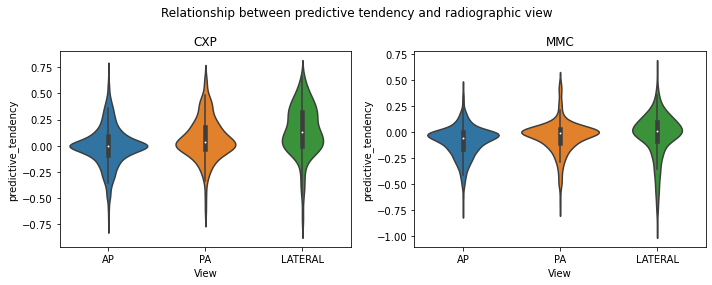

In [76]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(y='predictive_tendency', x='View', data=cxp_df, ax=axes[0])
axes[0].set_title('CXP')
sns.violinplot(y='predictive_tendency', x='View', data=mmc_df, ax=axes[1])
axes[1].set_title('MMC')

plt.suptitle('Relationship between predictive tendency and radiographic view')
plt.tight_layout()
fig.show()

In [29]:
print("CXP")
kruskal_wallis(df=cxp_df, 
               cat_name = 'View', groups=['AP', 'PA', 'LATERAL'],
              target_col='predictive_tendency')

CXP
KruskalResult(statistic=156.34312034068094, pvalue=1.1233698824326705e-34)
explained variance 0.04086333516484081


__p-values displayed here are not corrected for multiple comparisons__ <br>
__This notebook serves for demonstration purposes only__

In [28]:
posthoc_dunn_test(df=cxp_df,
                 cat_name= 'View',
                 groups = ['AP', 'PA', 'LATERAL'],
                 target_col = 'predictive_tendency')

,AP,LATERAL,PA
AP,1.000000e+00,8.712414e-31,5.788953e-08
LATERAL,8.712414e-31,1.000000e+00,1.195978e-05
PA,5.788953e-08,1.195978e-05,1.000000e+00


In [30]:
print("MMC")
kruskal_wallis(df=mmc_df, 
               cat_name = 'View', groups=['AP', 'PA', 'LATERAL'],
               target_col='predictive_tendency')

MMC
KruskalResult(statistic=132.5411506263636, pvalue=1.6559790147751277e-29)
explained variance 0.05171328545702832


In [31]:
posthoc_dunn_test(df=mmc_df,
                 cat_name= 'View',
                 groups = ['AP', 'PA', 'LATERAL'],
                 target_col = 'predictive_tendency')

,AP,LATERAL,PA
AP,1.000000e+00,1.205042e-25,1.207105e-10
LATERAL,1.205042e-25,1.000000e+00,2.412220e-02
PA,1.207105e-10,2.412220e-02,1.000000e+00


### Patient Race

In [34]:
race_list = ['White', 'Asian', 'Black']

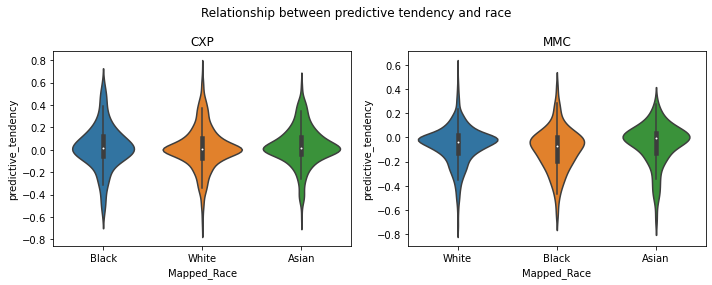

In [75]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(y='predictive_tendency', x='Mapped_Race', data=cxp_df.loc[cxp_df['Mapped_Race'].isin(race_list)], ax=axes[0])
axes[0].set_title('CXP')
sns.violinplot(y='predictive_tendency', x='Mapped_Race', data=mmc_df.loc[mmc_df['Mapped_Race'].isin(race_list)], ax=axes[1])
axes[1].set_title('MMC')

plt.suptitle('Relationship between predictive tendency and race')
plt.tight_layout()
fig.show()

In [36]:
print("CXP")
kruskal_wallis(df=cxp_df, 
               cat_name = 'Mapped_Race', groups=race_list,
              target_col='predictive_tendency')

CXP
KruskalResult(statistic=4.359357622347717, pvalue=0.11307784414841583)
explained variance 0.0015692432045888108


In [38]:
print("MMC")
kruskal_wallis(df=mmc_df, 
               cat_name = 'Mapped_Race', groups=race_list,
               target_col='predictive_tendency')

MMC
KruskalResult(statistic=13.34245925298787, pvalue=0.0012668400528028242)
explained variance 0.006296582941476107


### Patient Sex

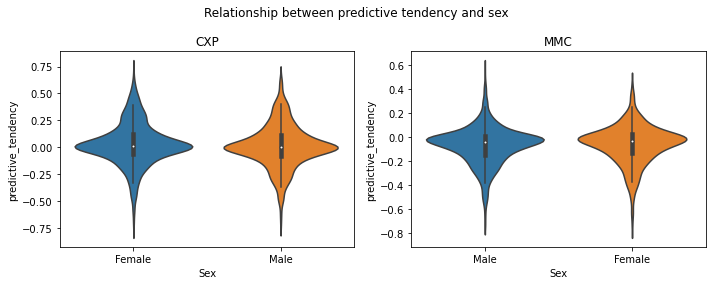

In [74]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(y='predictive_tendency', x='Sex', data=cxp_df, ax=axes[0])
axes[0].set_title('CXP')
sns.violinplot(y='predictive_tendency', x='Sex', data=mmc_df, ax=axes[1])
axes[1].set_title('MMC')

plt.suptitle('Relationship between predictive tendency and sex')
plt.tight_layout()
fig.show()

In [40]:
print("CXP")
kruskal_wallis(df=cxp_df, 
               cat_name = 'Sex', groups=['Female', 'Male'],
              target_col='predictive_tendency')

CXP
KruskalResult(statistic=8.549555653127301, pvalue=0.003456065785056749)
explained variance 0.0022345937410160224


In [41]:
print("MMC")
kruskal_wallis(df=mmc_df, 
               cat_name = 'Sex', groups=['Female', 'Male'],
               target_col='predictive_tendency')

MMC
KruskalResult(statistic=4.167650415001512, pvalue=0.041202900890939156)
explained variance 0.0016777980736721065


### Age

In [42]:
print('CXP')
spearmanr(cxp_df['Age'], cxp_df['predictive_tendency'])

CXP


SignificanceResult(statistic=0.0525722168479417, pvalue=0.0011401302555703611)

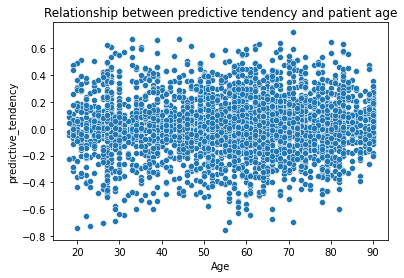

In [73]:
fig, ax = plt.subplots(1,1)
sns.scatterplot(cxp_df, x='Age', y='predictive_tendency', ax=ax)
ax.set_title('Relationship between predictive tendency and patient age')
fig.show()

In [44]:
print('MMC')
spearmanr(mmc_df['Age'], mmc_df['predictive_tendency'], 
         nan_policy='omit')

MMC


SignificanceResult(statistic=0.13702422923733457, pvalue=6.906929964310545e-12)

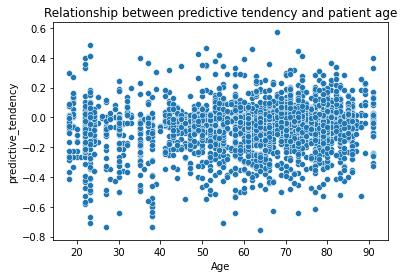

In [72]:
fig, ax = plt.subplots(1,1)
sns.scatterplot(mmc_df, x='Age', y='predictive_tendency', ax=ax)
ax.set_title('Relationship between predictive tendency and patient age')
fig.show()

## CDM Predictions and Structured Attributes

### Radiographic View

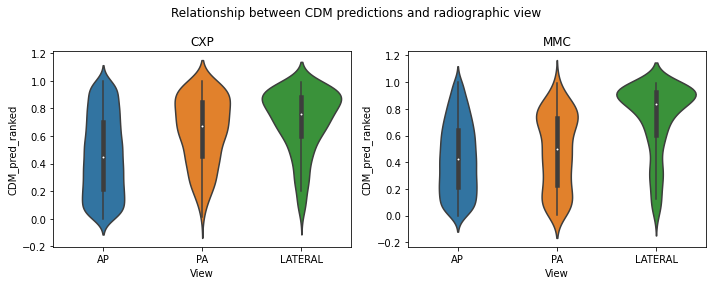

In [71]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(y='CDM_pred_ranked', x='View', data=cxp_df, ax=axes[0])
axes[0].set_title('CXP')
sns.violinplot(y='CDM_pred_ranked', x='View', data=mmc_df, ax=axes[1])
axes[1].set_title('MMC')

plt.suptitle('Relationship between CDM predictions and radiographic view')
plt.tight_layout()
fig.show()

In [50]:
print("CXP")
kruskal_wallis(df=cxp_df, 
               cat_name = 'View', groups=['AP', 'PA', 'LATERAL'],
               target_col='CDM_pred_ranked')

CXP
KruskalResult(statistic=275.328355217703, pvalue=1.6338316647650915e-60)
explained variance 0.07196245562407293


In [51]:
posthoc_dunn_test(df=cxp_df,
                 cat_name= 'View',
                 groups = ['AP', 'PA', 'LATERAL'],
                 target_col = 'CDM_pred_ranked')

,AP,LATERAL,PA
AP,1.000000e+00,2.623371e-44,2.314215e-23
LATERAL,2.623371e-44,1.000000e+00,4.666497e-03
PA,2.314215e-23,4.666497e-03,1.000000e+00


In [52]:
print("MMC")
kruskal_wallis(df=mmc_df, 
               cat_name = 'View', groups=['AP', 'PA', 'LATERAL'],
               target_col='CDM_pred_ranked')

MMC
KruskalResult(statistic=379.1836234461527, pvalue=4.5848206828774735e-83)
explained variance 0.14794522959272444


In [53]:
posthoc_dunn_test(df=mmc_df,
                 cat_name= 'View',
                 groups = ['AP', 'PA', 'LATERAL'],
                 target_col = 'CDM_pred_ranked')

,AP,LATERAL,PA
AP,1.000000e+00,1.080590e-83,1.457435e-02
LATERAL,1.080590e-83,1.000000e+00,1.857237e-35
PA,1.457435e-02,1.857237e-35,1.000000e+00


### Patient Race

In [54]:
race_list = ['White', 'Asian', 'Black']

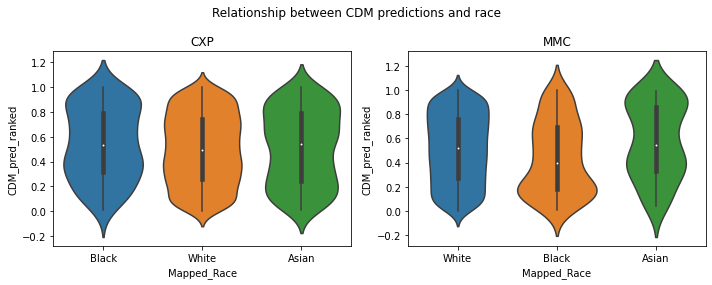

In [70]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(y='CDM_pred_ranked', x='Mapped_Race', data=cxp_df.loc[cxp_df['Mapped_Race'].isin(race_list)], ax=axes[0])
axes[0].set_title('CXP')
sns.violinplot(y='CDM_pred_ranked', x='Mapped_Race', data=mmc_df.loc[mmc_df['Mapped_Race'].isin(race_list)], ax=axes[1])
axes[1].set_title('MMC')

plt.suptitle('Relationship between CDM predictions and race')
plt.tight_layout()
fig.show()

In [56]:
print("CXP")
kruskal_wallis(df=cxp_df, 
               cat_name = 'Mapped_Race', groups=race_list,
              target_col='CDM_pred_ranked')

CXP
KruskalResult(statistic=3.5341405961171644, pvalue=0.17083274542494148)
explained variance 0.0012721888394950196


In [57]:
print("MMC")
kruskal_wallis(df=mmc_df, 
               cat_name = 'Mapped_Race', groups=race_list,
               target_col='CDM_pred_ranked')

MMC
KruskalResult(statistic=15.965765201262753, pvalue=0.0003412543034741447)
explained variance 0.007534575366334475


### Patient Sex

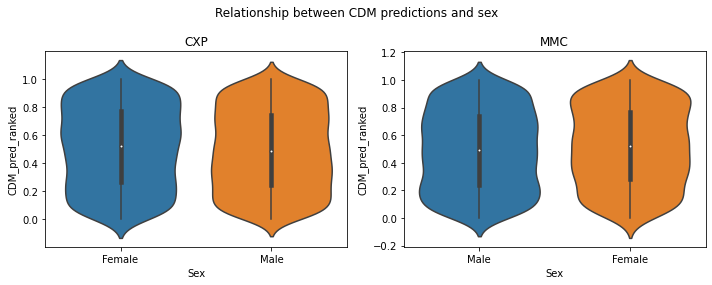

In [69]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(y='CDM_pred_ranked', x='Sex', data=cxp_df, ax=axes[0])
axes[0].set_title('CXP')
sns.violinplot(y='CDM_pred_ranked', x='Sex', data=mmc_df, ax=axes[1])
axes[1].set_title('MMC')

plt.suptitle('Relationship between CDM predictions and sex')
plt.tight_layout()
fig.show()

In [59]:
print("CXP")
kruskal_wallis(df=cxp_df, 
               cat_name = 'Sex', groups=['Female', 'Male'],
              target_col='CDM_pred_ranked')

CXP
KruskalResult(statistic=4.241178449851044, pvalue=0.039454771740938734)
explained variance 0.001108515015643242


In [60]:
print("MMC")
kruskal_wallis(df=mmc_df, 
               cat_name = 'Sex', groups=['Female', 'Male'],
               target_col='CDM_pred_ranked')

MMC
KruskalResult(statistic=4.05278300599598, pvalue=0.04409858809443307)
explained variance 0.001631555155392907


### Age

In [61]:
print('CXP')
spearmanr(cxp_df['Age'], cxp_df['CDM_pred_ranked'])

CXP


SignificanceResult(statistic=0.06325280949410424, pvalue=9.016629539221379e-05)

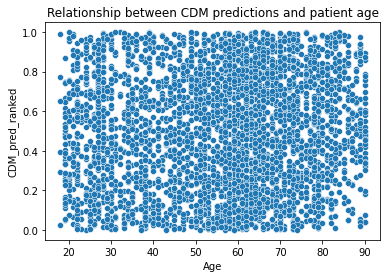

In [68]:
fig, ax = plt.subplots(1,1)
sns.scatterplot(cxp_df, x='Age', y='CDM_pred_ranked', ax=ax)
ax.set_title('Relationship between CDM predictions and patient age')
fig.show()

In [63]:
print('MMC')
spearmanr(mmc_df['Age'], mmc_df['CDM_pred_ranked'], 
         nan_policy='omit')

MMC


SignificanceResult(statistic=0.14969323417324243, pvalue=6.34692070904902e-14)

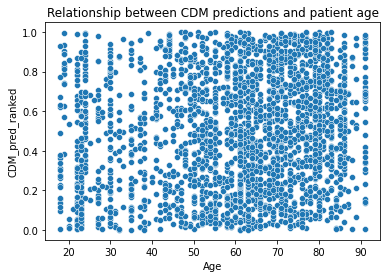

In [67]:
fig, ax = plt.subplots(1,1)
sns.scatterplot(mmc_df, x='Age', y='CDM_pred_ranked', ax=ax)
ax.set_title('Relationship between CDM predictions and patient age')
fig.show()